In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import visualizer
import os
import missingno
from collections import Counter
import wordcloud
#import emoji
import string
import nltk
import re

In [3]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ["class", "message"]

In [9]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df["len"] = [len(text) for text in df.message]

In [11]:
df.groupby("class").describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [12]:
df["class"].value_counts()/df["class"].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

In [8]:
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
tokener = nltk.word_tokenize

In [11]:
nltk.download('punkt')
common_words = {"word": [], "count": []}

for word in df["message"]:
    tok = tokener(word)
    print(tok)
    m_counter = Counter(tok)
    print(m_counter)
    print(m_counter.most_common(1))
    common_words["word"].append(m_counter.most_common(1)[0][0])
    common_words["count"].append(m_counter.most_common(1)[0][1])
    print("=========\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Streaming output truncated to the last 5000 lines.
['\\URGENT', '!', 'This', 'is', 'the', '2nd', 'attempt', 'to', 'contact', 'U', '!', 'U', 'have', 'WON', 'å£1000CALL', '09071512432', 'b4', '300603t', '&', 'csBCM4235WC1N3XX.callcost150ppmmobilesvary', '.', 'maxå£7', '.', '50\\', "''", "''"]
Counter({'!': 2, 'U': 2, '.': 2, "''": 2, '\\URGENT': 1, 'This': 1, 'is': 1, 'the': 1, '2nd': 1, 'attempt': 1, 'to': 1, 'contact': 1, 'have': 1, 'WON': 1, 'å£1000CALL': 1, '09071512432': 1, 'b4': 1, '300603t': 1, '&': 1, 'csBCM4235WC1N3XX.callcost150ppmmobilesvary': 1, 'maxå£7': 1, '50\\': 1})
[('!', 2)]

[':', '(', 'but', 'your', 'not', 'here', '....']
Counter({':': 1, '(': 1, 'but': 1, 'your': 1, 'not': 1, 'here': 1, '....': 1})
[(':', 1)]

['Not', 'directly', 'behind', '...', 'Abt', '4', 'rows', 'behind', 'Ì_', '...']
Counter({'behind': 2, '...': 2, 'Not': 1, 'directly': 1, 'Abt': 1, '4': 1, 'rows': 1, 'Ì_': 1})
[('behind', 2)]

['Congratulations', 'ur', 'awarded', '500', 'of', 'CD', 'vouchers', 

In [19]:
common_words_df = pd.concat([df, pd.DataFrame(common_words)], axis = 1)

In [20]:
common_words_df.head()

,class,message,len,word,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2


In [22]:
common_words_df[common_words_df["word"]=="Ok"]

,class,message,len,word,count
282,ham,Ok. I asked for money how far,29,Ok,1
286,ham,Ok..,4,Ok,1
340,ham,Ok that's great thanx a lot.,28,Ok,1
464,ham,Ok i am on the way to railway,29,Ok,1
475,ham,Ok I'm gonna head up to usf in like fifteen mi...,51,Ok,1
...,...,...,...,...,...
5163,ham,Ok leave no need to ask,23,Ok,1
5357,ham,Ok,2,Ok,1
5469,ham,Ok lor.,7,Ok,1
5473,ham,Ok lor Ì_ reaching then message me.,35,Ok,1


In [14]:
' '.join(common_words_df["word"])

"... ... to U he it like your ! to I to ! for ! : Oh i the to Is ha ... i Ffffffffff . Lol you I . that and K of your ... Oops I ... to . I - WHO I calls Did Fair Yeah I you & K . . & ! Sorry Tell Yes . ha Its Sorry i a '' to '' I ... Finished HI you U . . very & . Sorry K. hi You Yup , I I I , ! . Smile Please . to Watching we . . as . your . Umma Thanks I my I . the Going . . , . a ! . PRIVATE ! & a I ÌÏ Good . Are R K I Dear First Sunshine Want I He No u ... K Sir .. you Yes Whats to Ummma.will K Sindu i 2 ... your , Aaooooright I you . a I : . STOP . I . Hi . : Sir ... What , . the U & her to the . . He Going ? Haha Please Have I Are . : will you Gud Did ? i , & u & Goodmorning U ÌÏ . Aight & Both a Home : ... Sounds Finally . Easy I you . os Sorry . ! . ur Hey . Dear and Dear Sorry Yes . & the you . who Tomarrow PLEASSSSSSSEEEEEE . i U have I Kallis . Congratulations Ranjith angry you to I Do Mmm you ? ! Yup . MY to Why Same Not ! . Ringtone Come has HMV Usf . Thanx Tell Awesome J

In [24]:
words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(common_words_df["word"]))

In [25]:
words_cloud

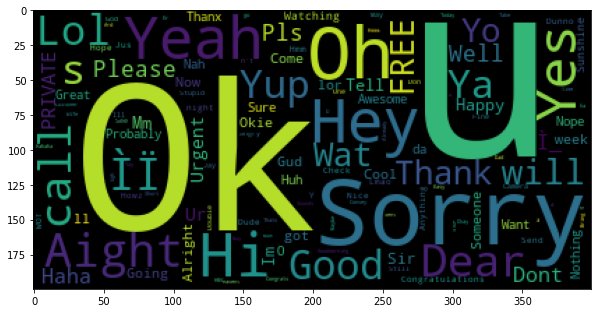

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(words_cloud)

In [25]:
df = df.drop("len", axis = 1)

In [26]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.message = df.message.apply(str.lower)

In [45]:
def remove_whitespace(text):
    
    clean_words = re.sub(' +', ' ', text)
    
    return clean_words

df.message = df.message.apply(remove_whitespace)

In [29]:
df.message[4]

"nah i don't think he goes to usf, he lives around here though"

In [31]:
def remove_punch(text):
  clean_words = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
  return clean_words
df.message = df.message.apply(remove_punch)

In [32]:
df.message[4]

'nah i don t think he goes to usf  he lives around here though'

In [33]:
df.message = df.message.apply(remove_whitespace)

In [34]:
df.message[4]

'nah i don t think he goes to usf  he lives around here though'

In [35]:
def remove_stopwords(text):
    
    tok_word = tokener(text)
    
    clean_words = []
    
    for word in tok_word:
        if word in stopword_list:
            continue
        else:
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.message = df.message.apply(remove_stopwords)

In [36]:
ham_class = df[df["class"] == "ham"]
spam_class = df[df["class"] == "spam"]

In [37]:
ham_class.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 4825, dtype: object

In [38]:
' '.join(ham_class.message)

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gon na home soon want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember 2 spell name yes v naughty make v wet fine way u feel way gota b seriously spell name going try 2 months ha ha joking pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love back amp packi

In [39]:
ham_text = ' '.join(ham_class.message)
spam_text = ' '.join(spam_class.message)

In [40]:
ham_wordcloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_wordcloud = wordcloud.WordCloud().generate_from_text(spam_text)

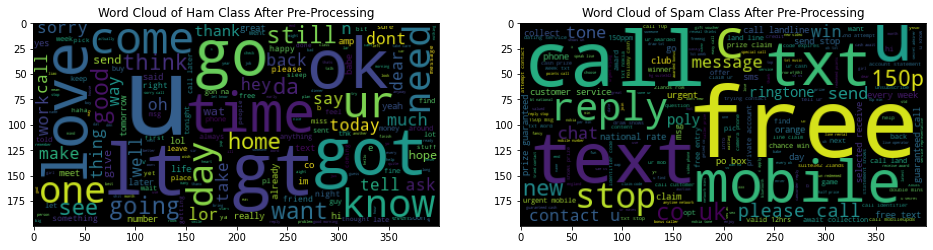

In [41]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.title("Word Cloud of Ham Class After Pre-Processing")
plt.imshow(ham_wordcloud)
plt.subplot(122)
plt.title("Word Cloud of Spam Class After Pre-Processing")
plt.imshow(spam_wordcloud)

In [42]:
def remove_digits(text):
  clean_text = re.sub(r"[^a-zA-Z]", " ", text.lower())
  return clean_text
df.message = df.message.apply(remove_digits)

In [43]:
df.message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [46]:
remove_whitespace(df.message[2])

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

In [47]:
lm = nltk.WordNetLemmatizer()

In [48]:
def lemma(text):
    
    tok_word = tokener(text)
    
    lemma_word = []
    
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
        
    return ' '.join(lemma_word)

In [51]:
nltk.download('wordnet')
nltk.download('omw-1.4')
df["lemma_message"] = df.message.apply(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [52]:
df.head(5)

,class,message,lemma_message
0,ham,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,nah think goes usf lives around though,nah think go usf life around though


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
final_df = df.iloc[:, [0, 2]]

In [60]:
final_df['class'] = final_df['class'].map({'spam': 1, 'ham': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
final_df

,class,lemma_message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood suggestion
5570,0,guy bitching acted like interested buying some...


In [65]:
X = final_df['lemma_message']
y = final_df['class']

In [66]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: int64

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))

In [69]:
scaled_x = tf_idf.fit_transform(X)